## Algorithmus von Floyd and Warshall

#### Kürzeste Wege


```
FLOYD-WARSHALL( W ):
    n = W.rows
    D(0) = W
    for k = 1 to n
        let D(k) = [ d[i][j](k) ] be a new n x n matrix
        for i = 1 to n
            for j = 1 to n
                d[i][j](k) = min(d[i][j](k-1), d[i][k](k-1) + d[k][j](k-1))

    return D(n)
```


[Simulation](https://www.cs.usfca.edu/~galles/visualization/Floyd.html)

[Beispiele](https://compprog.wordpress.com/2007/11/15/all-sources-shortest-path-the-floyd-warshall-algorithm/)

[Beispiel2](http://cis.k.hosei.ac.jp/~rhuang/Miccl/Algorithm3/lect24-floyd-warshall.pdf)

[Beispiel3](http://professorjava.weebly.com/shortest-path-floyd-warshall.html)

In [1]:
#Example 1 5x5
B1 = [
    [0,10,0,5,0]
    [10,0,5,5,10]
    [0,5,0,0,0]
    [5,5,0,0,20]
    [0,10,0,20,0]
]

BT_2 = [
    [0,8,0,1]
    [0,0,1,0]
    [4,0,0,0]
    [0,2,9,0]
]

#Example2 4 x 4
B2 = [
    [0,0,4,0]
    [8,0,0,2]
    [0,1,0,9]
    [1,0,0,0]
]
#Example 3 7x7
B2 = [
    [0,3,0,0,7,0,0]
    [3,0,2,0,4,3,0]
    [0,2,0,2,0,0,0]
    [0,0,2,0,0,0,2]
    [7,4,0,0,0,1,0]
    [0,3,0,0,1,0,2]
    [0,0,0,2,0,2,0]
]

B = [
    [0,1,0,0,7,0,0]
    [1,0,8,0,0.5,3,0]
    [0,8,0,2,0,0,0]
    [0,0,2,0,0,0,2]
    [7,0.5,0,0,0,1,0]
    [0,3,0,0,1,0,2]
    [0,0,0,2,0,2,0]
]


Bx = [
    [0,10,0,0,0]
    [10,0,5,0,10]
    [0,5,0,0,0]
    [0,0,0,0,20]
    [0,10,0,20,0]
]

A = reshape(B, 7, 7)

7x7 Array{Float64,2}:
 0.0  1.0  0.0  0.0  7.0  0.0  0.0
 1.0  0.0  8.0  0.0  0.5  3.0  0.0
 0.0  8.0  0.0  2.0  0.0  0.0  0.0
 0.0  0.0  2.0  0.0  0.0  0.0  2.0
 7.0  0.5  0.0  0.0  0.0  1.0  0.0
 0.0  3.0  0.0  0.0  1.0  0.0  2.0
 0.0  0.0  0.0  2.0  0.0  2.0  0.0

INFO: Loading help data...


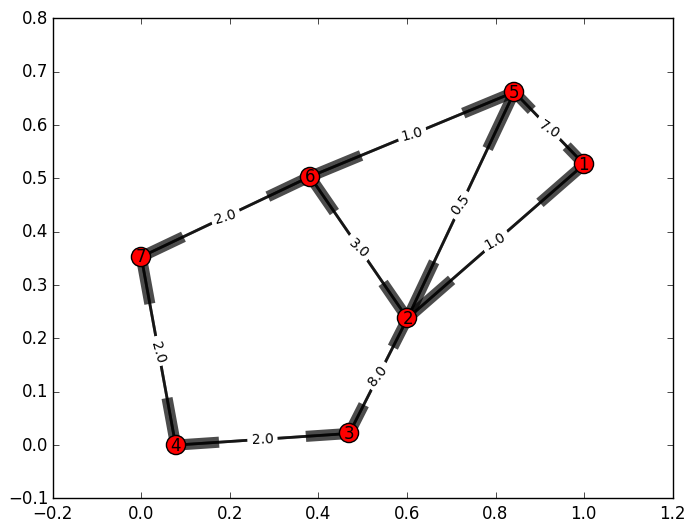

PyObject <matplotlib.collections.LineCollection object at 0x11c0cc490>

/Library/Frameworks/EPD64.framework/Versions/7.3/lib/python2.7/site-packages/matplotlib/text.py:52: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if rotation in ('horizontal', None):
/Library/Frameworks/EPD64.framework/Versions/7.3/lib/python2.7/site-packages/matplotlib/text.py:54: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif rotation == 'vertical':


In [2]:
using PyPlot;
using PyCall;
@pyimport networkx as nx

N = size(A)[1]
tmp = reshape(A,1,N*N)
c = 1

cols = Array(Int64, 0)
rows = Array(Int64, 0)
weights = Array(Float64,0)

#gr = nx.Graph()
#gr = nx.DiGraph()
gr = nx.MultiDiGraph()

for y in 1:N
    for x in 1:N
        if tmp[c]>0
            push!(cols,y)
            push!(rows,x)
            push!(weights,tmp[c])
        end
        c =c+1
    end
end

edges = Array((Int64,Int64,Float64), 0)


for edge in zip(rows,cols,weights)
    push!(edges,edge)
end

pycall(gr["add_weighted_edges_from"],Any,edges)
pos=nx.spring_layout(gr)
edge_labels=Dict([((u,v,),d["weight"]) for (u,v,d) in pycall(gr["edges"],Array,(data=true))])
nx.draw_networkx_edge_labels(gr,pos,edge_labels=edge_labels)
#nl = pycall(gr["nodes"],Array,())
labels=[i => "$(i)" for i = 1:N]
nx.draw_networkx_labels(gr,pos,labels)
nx.draw_networkx_nodes(gr,pos,labels,  node_size=190)
el = [(u,v) for (u,v,d) in pycall(gr["edges"],Array,(data=true))]
nx.draw_networkx_edges(gr,pos,edgelist=el,width=2,alpha=0.7)

In [3]:
N=7
[i => "$(i)" for i = 1:N]

Dict{Any,Any} with 7 entries:
  7 => "7"
  4 => "4"
  2 => "2"
  3 => "3"
  5 => "5"
  6 => "6"
  1 => "1"

### Initalisierungs Matrix

- Input Adjacency matrix 
- Output 1. Distmatrix 
            Diagonalen --> 0
            kantenlose Distanzen --> maximal Wert

In [4]:
function initFW(A, mw=10^2)
    N = size(A)[1]
    E = [A[i,j] for i=1:N,j=1:N]
    
    for i = 1:N # Zeile
        for j = 1:N # Spalte  
            if E[i,j] == 0 && i != j
                E[i,j]=mw
            end
        end
    end
    return E
end

initFW (generic function with 2 methods)

### Floyd Warshall

- Input E
- Output Array D 

    Lösung D[N+1]

In [5]:
function FloydWarshall(E)
    N = size(E)[1]
    D = Array(Array, 0)
    push!(D,E)
    
    for k = 1:N # Iteration 
        tmp = [D[k][i,j] for i=1:N,j=1:N]
        push!(D,tmp) # 1..N+1
        for i = 1:N # Zeile
            for j = 1:N # Spalte   
                if D[k+1][i,j] > D[k][i,k] + D[k][k,j]
                    D[k+1][i,j] = D[k][i,k] + D[k][k,j]               
                end
            end
        end
    end
    return D
end

FloydWarshall (generic function with 1 method)

### Visualisierung der Berechnugsschritte

In [6]:
function VisuIterations(D,nrrows=4)
    N = size(D[1])[1]
    figure(figsize=(3*3, 4*2))
    subplots_adjust(bottom=.05, left=.04, right=.96, top=.98, hspace=.25)
    
    for i = 1:N
        subplot(nrrows, 2, i)
        title("Iteration $(i)")
        imgplot = imshow(D[i+1],vmin=0,vmax=16)
        plt.colorbar()
        pycall(imgplot["set_interpolation"],Any,"nearest")
    end
end

VisuIterations (generic function with 2 methods)

### Anwendung Floyd Warshall + Visualisierung

- Input
 0  3  0  0  7  0  0<br>
 3  0  2  0  4  3  0<br>
 0  2  0  2  0  0  0<br>
 0  0  2  0  0  0  2<br>
 7  4  0  0  0  1  0<br>
 0  3  0  0  1  0  2<br>
 0  0  0  2  0  2  0<br>
 

- Output 

    Visualisierung



Any[0 3 5 7 7 6 8
    3 0 2 4 4 3 5
    5 2 0 2 6 5 4
    7 4 2 0 5 4 2
    7 4 6 5 0 1 3
    6 3 5 4 1 0 2
    8 5 4 2 3 2 0]

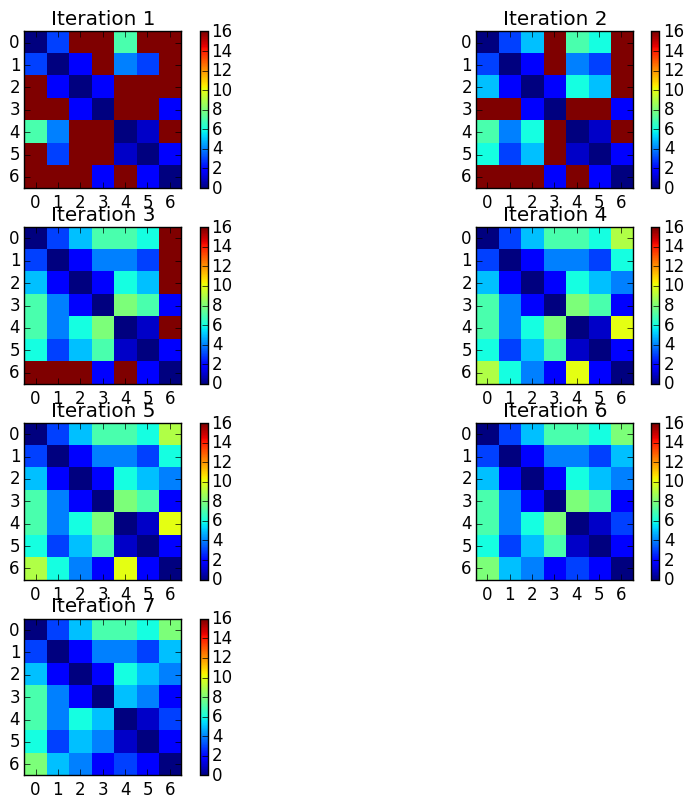

In [7]:
#Example 3 7x7
B = [
    [0,3,0,0,7,0,0]
    [3,0,2,0,4,3,0]
    [0,2,0,2,0,0,0]
    [0,0,2,0,0,0,2]
    [7,4,0,0,0,1,0]
    [0,3,0,0,1,0,2]
    [0,0,0,2,0,2,0]
]
A = reshape(B, 7, 7)

E = initFW(A)

D = FloydWarshall(E)

VisuIterations(D)

print(D[8])

### Musterlösung


 { 0, 3, 5, 7, 7, 6, 8 }<bR>
 { 3, 0, 2, 4, 4, 3, 5 }<bR>
 { 5, 2, 0, 2, 6, 5, 4 }<bR>
 { 7, 4, 2, 0, 5, 4, 2 }<bR>
 { 7, 4, 6, 5, 0, 1, 3 }<bR>
 { 6, 3, 5, 4, 1, 0, 2 }<bR>
 { 8, 5, 4, 2, 3, 2, 0 }<bR>

## Floyd­Warshall with path recovery
#### Wege mit protokollieren

- Modifizierung des Algorithmus
- Speicherung des letzten Schritts
- Zeile nach Spalte

In [8]:
function initFWPR(A, mw=10^2)
    N = size(A)[1]
    E = [A[i,j] for i=1:N,j=1:N]
    P = [0 for i=1:N,j=1:N]
    
    for i = 1:N # Zeile
        for j = 1:N # Spalte  
            if E[i,j] == 0
                if i!=j
                    E[i,j]=mw
                end
                P[i,j]=-1
            else
                P[i,j]=i
            end
        end
    end
    return E,P
end

initFWPR (generic function with 2 methods)

In [9]:
function FloydWarshallPR(E,P)
    N = size(E)[1]
    D = Array(Array, 0)
    push!(D,E)
    
    #Initialisiere die letzten Knoten
    
    for k = 1:N # Iteration 
        tmp = [D[k][i,j] for i=1:N,j=1:N]
        push!(D,tmp) # 1..N+1
        for i = 1:N # Zeile
            for j = 1:N # Spalte   
                if D[k+1][i,j] > D[k][i,k] + D[k][k,j]
                    D[k+1][i,j] = D[k][i,k] + D[k][k,j] 
                    P[i,j] = P[k,j];
                end
            end
        end
    end
    return D,P
end

FloydWarshallPR (generic function with 1 method)

In [10]:
function getPath(P,i,j)
    path = Int64[]
    if P[i,j]==-1
        return path
    end
    
    while i != j
        push!(path,j)
        j = P[i,j]
    end
    push!(path,i)
    return reverse(path)
end


function getEdges(path)
    edges = (Int64,Int64)[]
    l=size(path)[1]
    for i in 1:l-1
        push!(edges,(path[i],path[i+1]))
    end
    return edges
end

getEdges (generic function with 1 method)

In [11]:
## Function to Visualiaze a graph from Adjacency matrix 
## input Adjacency matrix 
function VisuGraph(A)
    N = size(A)[1]
    print(N)
    tmp = reshape(A,1,N*N)
    c = 1
    
    cols = Int64[]
    rows = Int64[]
    weights = Float64[]
    
    gr = nx.MultiDiGraph()
    
    for y in 1:N
        for x in 1:N
            if tmp[c]>0
                push!(cols,y)
                push!(rows,x)
                push!(weights,tmp[c])
            end
            c =c+1
        end
    end
    
    edges = Array((Int64,Int64,Float64), 0)
    
    for edge in zip(rows,cols,weights)
        push!(edges,edge)
    end
    
    pycall(gr["add_weighted_edges_from"],Any,edges)
    pos=nx.spring_layout(gr)
    edge_labels=Dict([((u,v,),d["weight"]) for (u,v,d) in pycall(gr["edges"],Array,(data=true))])
    nx.draw_networkx_edge_labels(gr,pos,edge_labels=edge_labels)
    #nl = pycall(gr["nodes"],Array,())
    labels=[i => "$(i)" for i = 1:N]
    nx.draw_networkx_labels(gr,pos,labels)
    nx.draw_networkx_nodes(gr,pos,labels,  node_size=190)
    el = [(u,v) for (u,v,d) in pycall(gr["edges"],Array,(data=true))]
    nx.draw_networkx_edges(gr,pos,edgelist=el,width=2,alpha=0.7)
    return gr
end

VisuGraph (generic function with 1 method)

In [12]:
## Function to Visualize a path in a graph 
## Input A-Matrix , Path
function VisuPath(path,A)
    N = size(A)[1]
    print(N)
    tmp = reshape(A,1,N*N)
    c = 1
    
    cols = Int64[]
    rows = Int64[]
    weights = Float64[]
    
    gr = nx.MultiDiGraph()
    
    for y in 1:N
        for x in 1:N
            if tmp[c]>0
                push!(cols,y)
                push!(rows,x)
                push!(weights,tmp[c])
            end
            c =c+1
        end
    end
    
    edges = Array((Int64,Int64,Float64), 0)
    
    for edge in zip(rows,cols,weights)
        push!(edges,edge)
    end
    
    pycall(gr["add_weighted_edges_from"],Any,edges)
    pos=nx.spring_layout(gr)
    edge_labels=Dict([((u,v,),d["weight"]) for (u,v,d) in pycall(gr["edges"],Array,(data=true))])
    nx.draw_networkx_edge_labels(gr,pos,edge_labels=edge_labels)
    #nl = pycall(gr["nodes"],Array,())
    labels=[i => "$(i)" for i = 1:N]
    nx.draw_networkx_labels(gr,pos,labels)
    nx.draw_networkx_nodes(gr,pos,labels,  node_size=190)
    el = [(u,v) for (u,v,d) in pycall(gr["edges"],Array,(data=true))]
    nx.draw_networkx_edges(gr,pos,edgelist=path,width=2,alpha=0.7)
    return gr
end

VisuPath (generic function with 1 method)

7

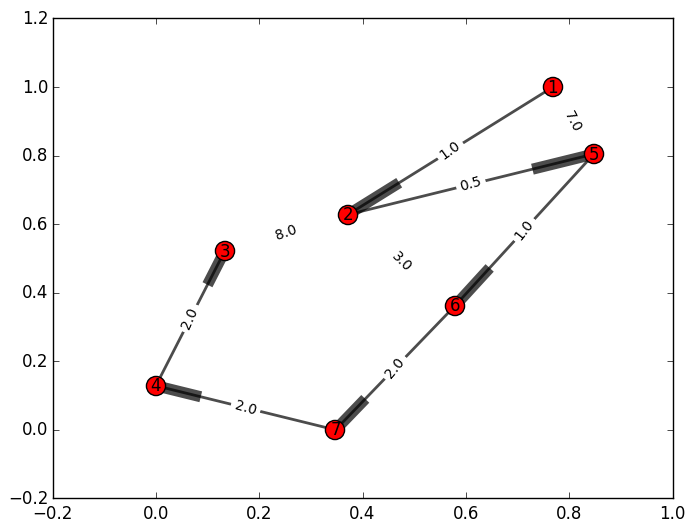

PyObject <networkx.classes.multidigraph.MultiDiGraph object at 0x128d03510>

In [13]:
#Example 3 7x7
B = [
    [0,1,0,0,7,0,0]
    [1,0,8,0,0.5,3,0]
    [0,8,0,2,0,0,0]
    [0,0,2,0,0,0,2]
    [7,0.5,0,0,0,1,0]
    [0,3,0,0,1,0,2]
    [0,0,0,2,0,2,0]
]
A = reshape(B, 7, 7)

E,P = initFWPR(A)


D,P = FloydWarshallPR(E,P)

path=getPath(P,1,3)

elist=getEdges(path)

#VisuGraph(A)

VisuPath(elist,A)